In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [6]:
# Load dataset
df = pd.read_csv(r"C:\Users\neeta\Downloads\Electric Vehicle Sales by State in India.csv")
print(df.shape)
print(df.head())


(96845, 8)
     Year Month_Name      Date           State         Vehicle_Class  \
0  2014.0        jan  1/1/2014  Andhra Pradesh       ADAPTED VEHICLE   
1  2014.0        jan  1/1/2014  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014.0        jan  1/1/2014  Andhra Pradesh             AMBULANCE   
3  2014.0        jan  1/1/2014  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014.0        jan  1/1/2014  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
0           Others       Others                0.0  
1           Others       Others                0.0  
2           Others       Others                0.0  
3           Others       Others                0.0  
4              Bus          Bus                0.0  


In [8]:
# Convert 'Year' to int and 'Date' to datetime
df['Year'] = df['Year'].astype(int)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convert categorical columns to 'category' dtype
cat_cols = ['Month_Name', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']
for col in cat_cols:
    df[col] = df[col].astype('category')

# Check for missing values and fill if necessary
print(df.isnull().sum())
# Fill numeric column with median
df['EV_Sales_Quantity'] = df['EV_Sales_Quantity'].fillna(df['EV_Sales_Quantity'].median())

# Fill all remaining missing values with mode (most frequent value) for each column
df = df.fillna(df.mode().iloc[0])



Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


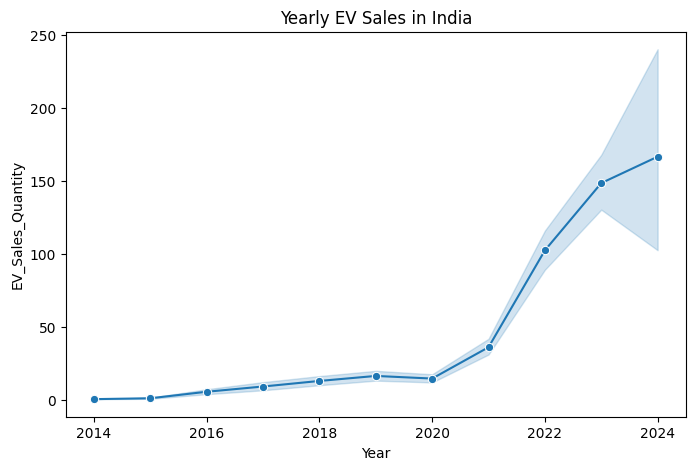

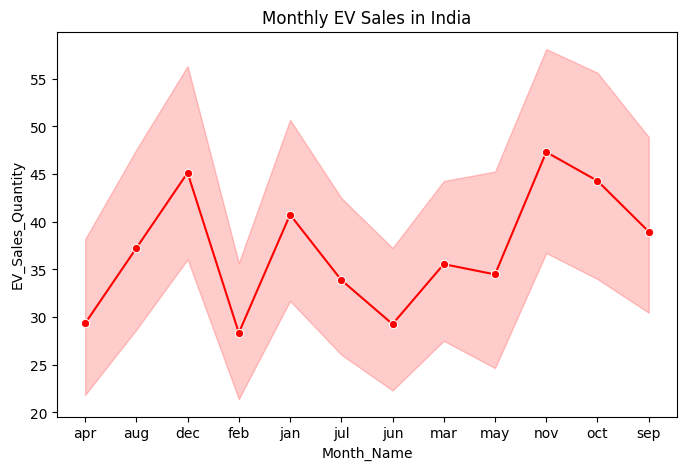

C:\Users\neeta\AppData\Local\Temp\ipykernel_16876\749579174.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='State', x='EV_Sales_Quantity', data=df, palette='bright')


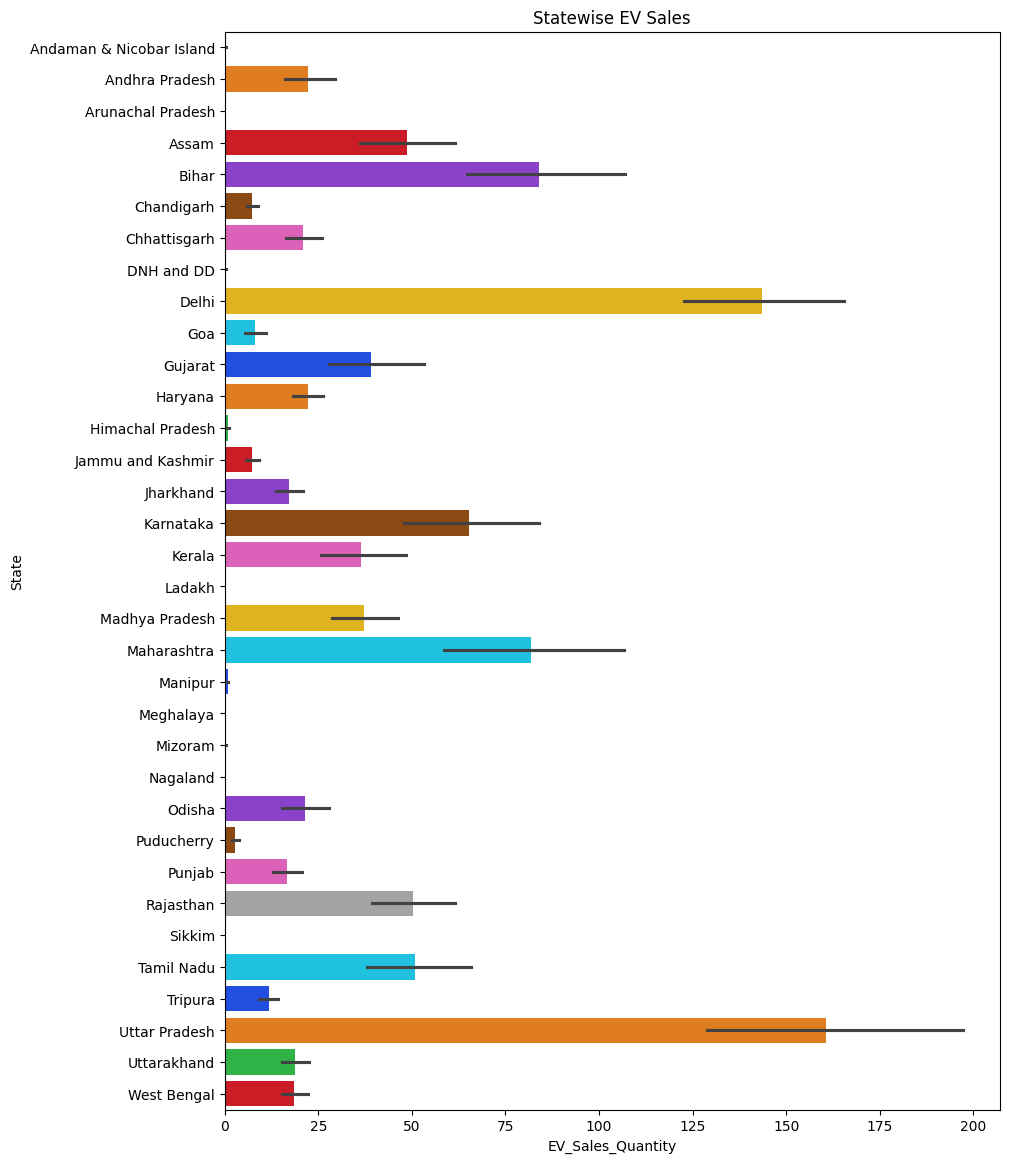

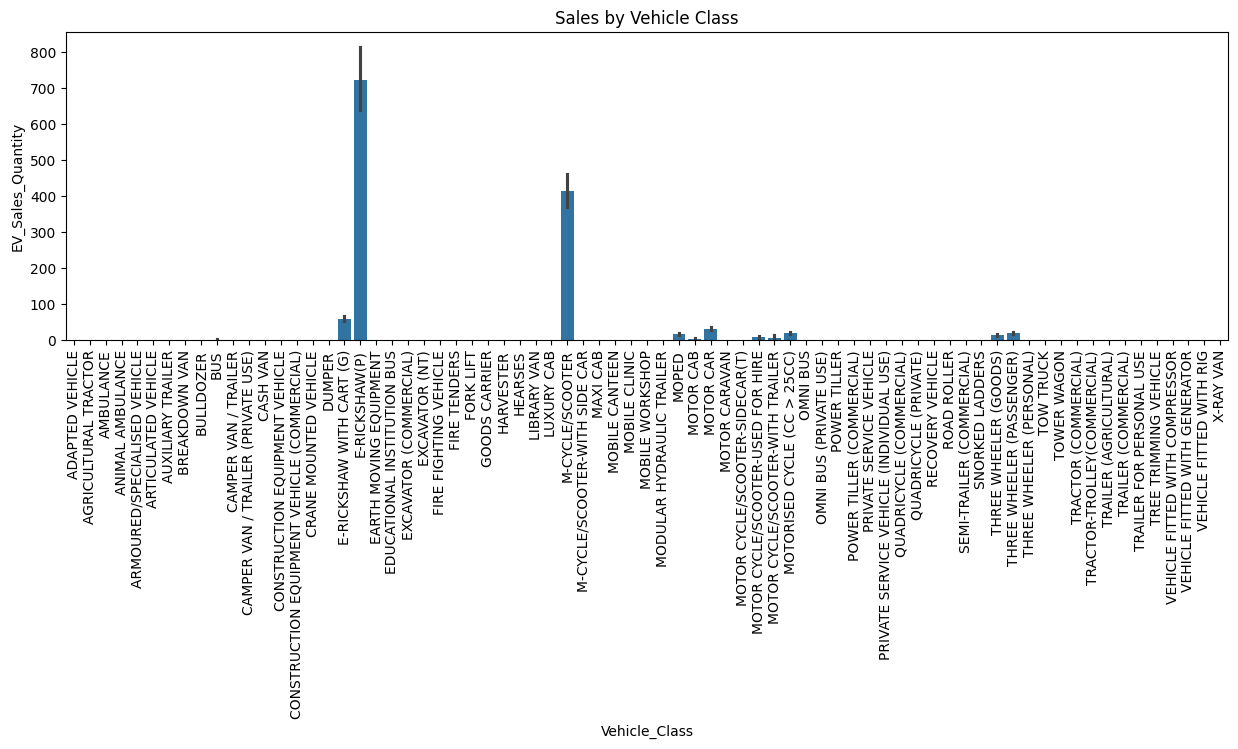

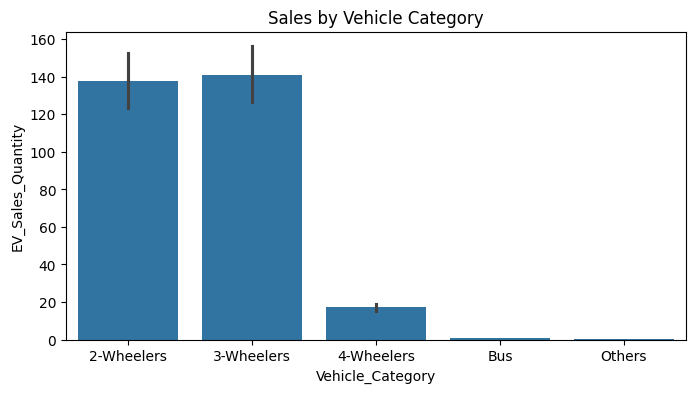

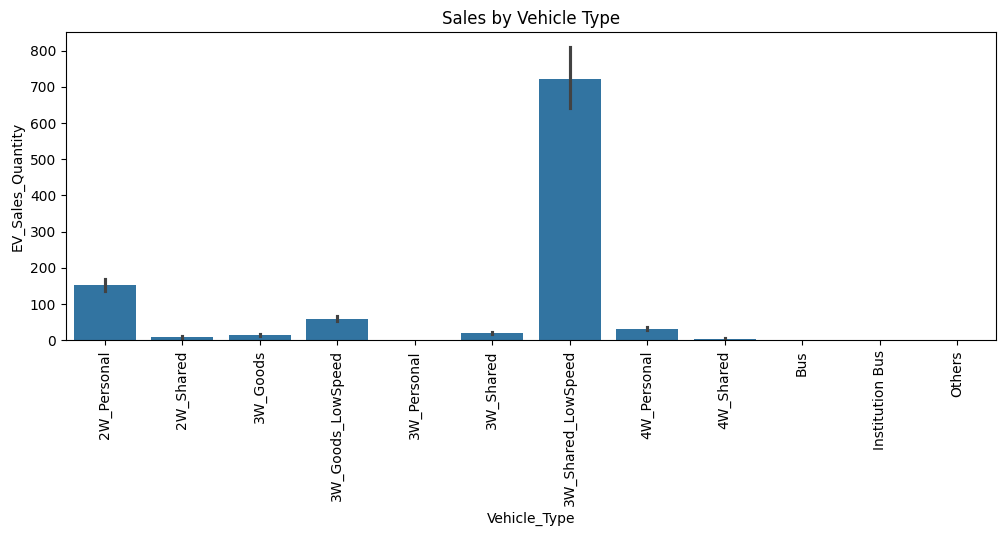

In [9]:
# Yearly sales trend
plt.figure(figsize=(8,5))
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=df, marker='o')
plt.title('Yearly EV Sales in India')
plt.show()

# Monthly sales trend
plt.figure(figsize=(8,5))
sns.lineplot(x='Month_Name', y='EV_Sales_Quantity', data=df, marker='o', color='r')
plt.title('Monthly EV Sales in India')
plt.show()

# State-wise sales
plt.figure(figsize=(10,14))
sns.barplot(y='State', x='EV_Sales_Quantity', data=df, palette='bright')
plt.title('Statewise EV Sales')
plt.show()

# Vehicle class/category/type analysis
plt.figure(figsize=(15,4))
sns.barplot(x='Vehicle_Class', y='EV_Sales_Quantity', data=df)
plt.title('Sales by Vehicle Class')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity', data=df)
plt.title('Sales by Vehicle Category')
plt.show()

plt.figure(figsize=(12,4))
sns.barplot(x='Vehicle_Type', y='EV_Sales_Quantity', data=df)
plt.title('Sales by Vehicle Type')
plt.xticks(rotation=90)
plt.show()


In [10]:
# Extract month and day from date
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type', 'Month_Name'], drop_first=True)

# Drop unused columns
df_encoded.drop(['Date'], axis=1, inplace=True)


In [11]:
# Feature/target split
X = df_encoded.drop('EV_Sales_Quantity', axis=1)
y = df_encoded['EV_Sales_Quantity']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Root Mean Squared Error: 130.9110826275662


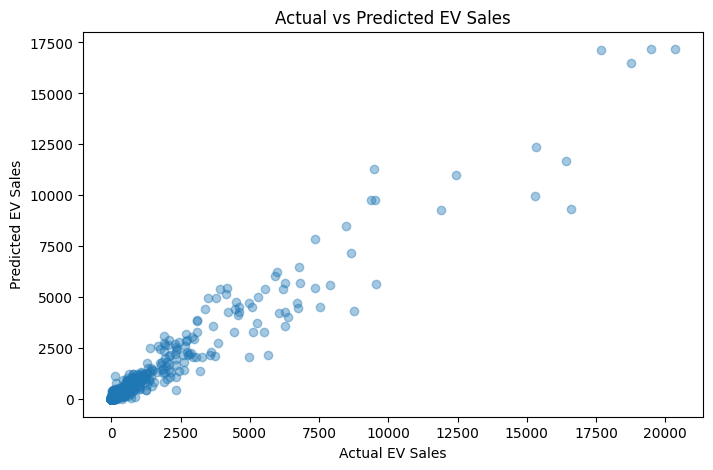

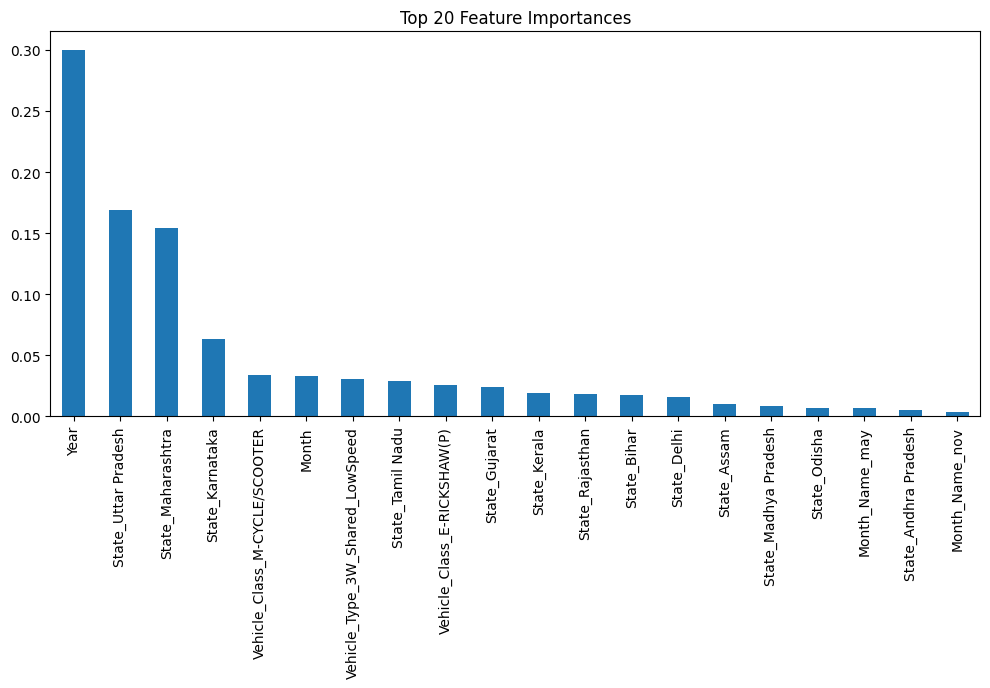

In [12]:
# RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Actual vs Predicted Plot
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel('Actual EV Sales')
plt.ylabel('Predicted EV Sales')
plt.title('Actual vs Predicted EV Sales')
plt.show()

# Feature Importance
importance = model.feature_importances_
features = X_train.columns
feature_importance = pd.Series(importance, index=features).sort_values(ascending=False)

plt.figure(figsize=(12,5))
feature_importance.head(20).plot(kind='bar')
plt.title('Top 20 Feature Importances')
plt.show()
